<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [72]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import glob
from math import log10, sqrt

**Gamma Correction**

Gamma Correction pada Citra
-------------------------
Masukkan nilai gamma: 3


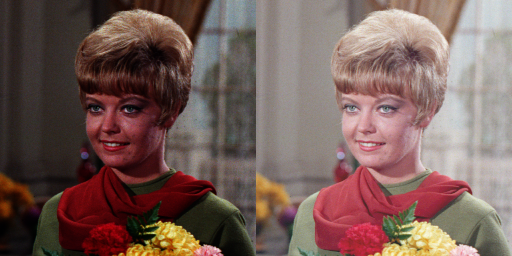

In [ ]:
print('Gamma Correction pada Citra')
print('-------------------------')

try:
    # Membaca nilai gamma dari input pengguna
    gamma = float(input("Masukkan nilai gamma: "))
except ValueError:
    print('Error, bukan angka')

# Membaca gambar asli
original = cv.imread('female.tiff')

# Membuat gambar gamma dengan ukuran yang sama seperti gambar asli
gamma_image = np.zeros_like(original)

# Melakukan perubahan gamma pada setiap piksel gambar
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Menghitung nilai piksel baru dengan perubahan gamma
            gamma_image[y, x, c] = np.clip(255 * pow(original[y, x, c] / 255, (1 / gamma)), 0, 255)

# Menggabungkan gambar asli dan gambar gamma menjadi satu frame
final_frame = cv.hconcat([original, gamma_image])

# Menampilkan frame hasil
cv2_imshow(final_frame)


**Image Depth**

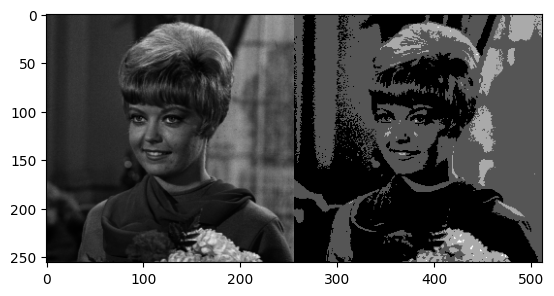

In [ ]:
import cv2
import numpy as np

# Membaca citra grayscale
original = cv2.imread('female.tiff', cv2.IMREAD_GRAYSCALE)

# Membuat citra "depth image" (citra kedalaman) dengan bit depth 2
bit_depth = 2
level = 255 // (2 ** bit_depth - 1)

# Membuat citra kosong dengan ukuran yang sama dengan citra asli
depth_image = np.zeros(original.shape, dtype=np.uint8)

# Melakukan perubahan bit depth pada setiap piksel gambar
for y in range(original.shape[0]):
    # Menghitung nilai piksel baru dengan bit depth yang baru
    depth_image[y] = np.clip(np.round(original[y] / level) * level, 0, 255)

# Menggabungkan gambar asli dan citra "depth image" menjadi satu frame
final_frame = cv.hconcat([original, depth_image])
final_frame = cv.cvtColor(final_frame, cv.COLOR_BGR2RGB)

# Menampilkan frame hasil dengan plot
plt.imshow(final_frame)

**Average Denoising**

Nilai PSNR adalah 27.53926974632642 (dB)


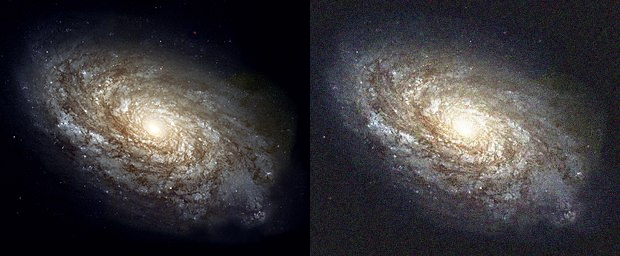

In [53]:
# 1. Jumlah Citra di Average: 5

# Membaca citra asli
original = cv2.imread('/content/drive/MyDrive/dataset/galaxy.jpg')

# Membaca citra-citra noise
cv_img = []
for img in glob.glob('/content/drive/MyDrive/dataset/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

# Menggabungkan citra-citra noise
dst = cv_img[0]
noise_number = 4
for i in range(1, noise_number):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR
def calculate_PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Menghitung PSNR antara citra asli dan citra hasil
psnr = calculate_PSNR(original, dst)

# Menampilkan nilai PSNR
print('Nilai PSNR adalah', psnr, '(dB)')

# Menggabungkan citra asli dan citra hasil
galaxy_frame = cv2.hconcat((original, dst))

# Menampilkan frame hasil
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.5574176966309 (dB)


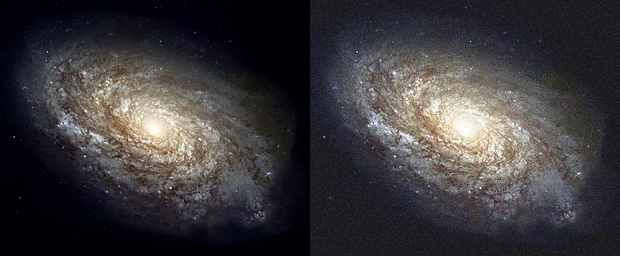

In [56]:
# 2. Jumlah Citra di Average: 10

# Menggabungkan citra-citra noise
dst = cv_img[0]
noise_number = 10
for i in range(1, noise_number):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR
def calculate_PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Menghitung PSNR antara citra asli dan citra hasil
psnr = calculate_PSNR(original, dst)

# Menampilkan nilai PSNR
print('Nilai PSNR adalah', psnr, '(dB)')

# Menggabungkan citra asli dan citra hasil
galaxy_frame = cv2.hconcat((original, dst))

# Menampilkan frame hasil
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.539478764085914 (dB)


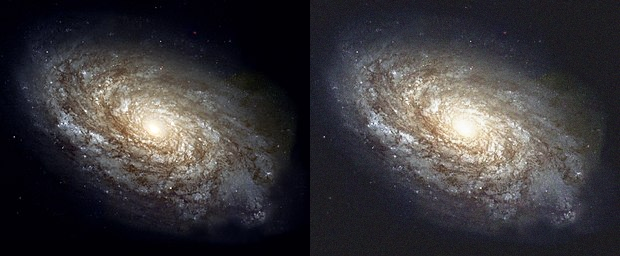

In [57]:
# 3. Jumlah Citra di Average: 20

# Menggabungkan citra-citra noise
dst = cv_img[0]
noise_number = 20
for i in range(1, noise_number):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR
def calculate_PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Menghitung PSNR antara citra asli dan citra hasil
psnr = calculate_PSNR(original, dst)

# Menampilkan nilai PSNR
print('Nilai PSNR adalah', psnr, '(dB)')

# Menggabungkan citra asli dan citra hasil
galaxy_frame = cv2.hconcat((original, dst))

# Menampilkan frame hasil
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51020635357782 (dB)


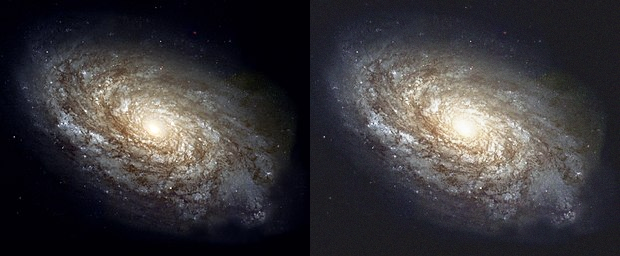

In [58]:
# 4. Jumlah Citra di Average: 40

# Menggabungkan citra-citra noise
dst = cv_img[0]
noise_number = 40
for i in range(1, noise_number):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR
def calculate_PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Menghitung PSNR antara citra asli dan citra hasil
psnr = calculate_PSNR(original, dst)

# Menampilkan nilai PSNR
print('Nilai PSNR adalah', psnr, '(dB)')

# Menggabungkan citra asli dan citra hasil
galaxy_frame = cv2.hconcat((original, dst))

# Menampilkan frame hasil
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.503680679204336 (dB)


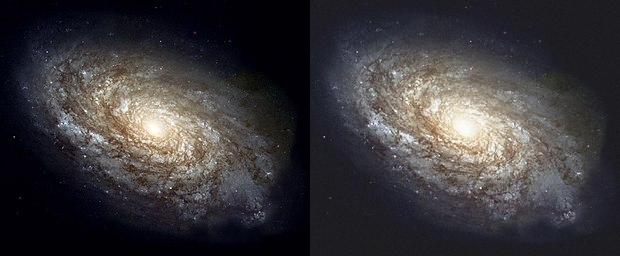

In [59]:
# 5. Jumlah Citra di Average: 80

# Menggabungkan citra-citra noise
dst = cv_img[0]
noise_number = 80
for i in range(1, noise_number):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR
def calculate_PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Menghitung PSNR antara citra asli dan citra hasil
psnr = calculate_PSNR(original, dst)

# Menampilkan nilai PSNR
print('Nilai PSNR adalah', psnr, '(dB)')

# Menggabungkan citra asli dan citra hasil
galaxy_frame = cv2.hconcat((original, dst))

# Menampilkan frame hasil
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.507449521562517 (dB)


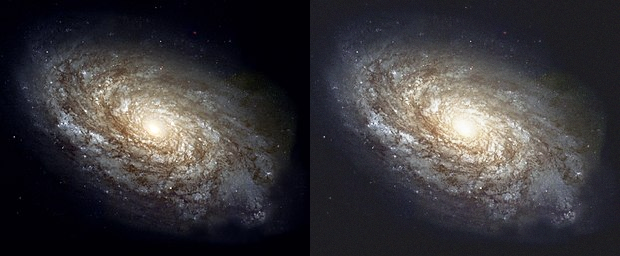

In [60]:
# 6. Jumlah Citra di Average: 100

# Menggabungkan citra-citra noise
dst = cv_img[0]
noise_number = 100
for i in range(1, noise_number):
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR
def calculate_PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Menghitung PSNR antara citra asli dan citra hasil
psnr = calculate_PSNR(original, dst)

# Menampilkan nilai PSNR
print('Nilai PSNR adalah', psnr, '(dB)')

# Menggabungkan citra asli dan citra hasil
galaxy_frame = cv2.hconcat((original, dst))

# Menampilkan frame hasil
cv2_imshow(galaxy_frame)

**Kesimpulan**

Dengan meningkatnya jumlah citra yang diaverage, nilai PSNR cenderung semakin tinggi. Ini menunjukkan bahwa proses penggabungan citra noise dari beberapa citra memiliki potensi untuk meningkatkan kualitas citra dan mengurangi tingkat noise. Semakin banyak citra yang digunakan dalam averaging, semakin baik hasilnya dalam mengembalikan citra asli dan meningkatkan kualitas gambar.

**Image Masking**

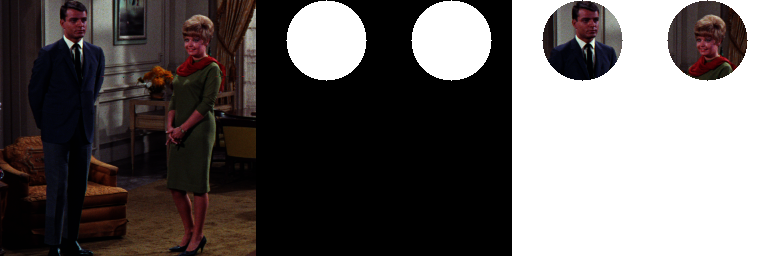

In [79]:
# Membaca citra
img_t = cv.imread('/content/drive/MyDrive/dataset/couple.tiff')

# Membuat mask
mask = np.zeros_like(img_t)
cv.circle(mask, (70, 40), 40, (255, 255, 255), -1)
cv.circle(mask, (195, 40), 40, (255, 255, 255), -1)

# Menggunakan bitwise_and untuk menggabungkan citra asli dan mask
result = cv.bitwise_and(img_t, mask)

# Mengganti bagian hitam dalam mask menjadi putih
result[mask == 0] = 255

# Menggabungkan citra asli, mask, dan hasilnya menjadi satu frame
final_frame = cv.hconcat((img_t, mask, result))

# Menampilkan frame hasil
cv2_imshow(final_frame)

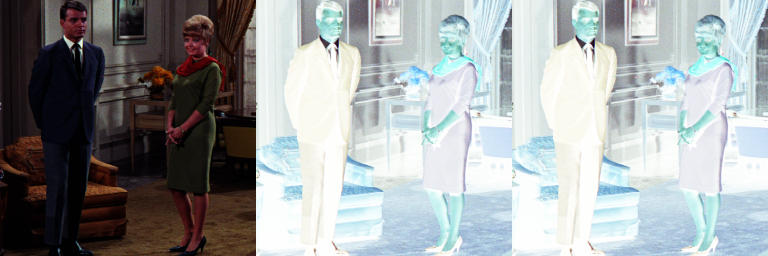

In [94]:
# Membaca citra
img_t = cv.imread('/content/drive/MyDrive/dataset/couple.tiff')

# Membuat mask
mask = np.zeros_like(img_t)
cv.circle(mask, (70, 40), 40, (255, 255, 255), -1)
cv.circle(mask, (195, 40), 40, (255, 255, 255), -1)

# Menggunakan bitwise_not untuk menggabungkan citra asli dan komplemen mask
not_result = cv.bitwise_not(img_t, mask)

# Menggabungkan citra asli, mask, dan hasilnya menjadi satu frame
final_frame_not = cv.hconcat((img_t, mask, not_result))

# Menampilkan frame hasil
cv2_imshow(final_frame_not)

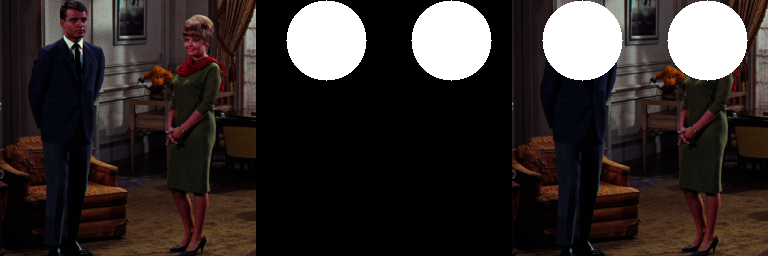

In [97]:
# Membaca citra
img_t = cv.imread('/content/drive/MyDrive/dataset/couple.tiff')

# Membuat mask
mask = np.zeros_like(img_t)
cv.circle(mask, (70, 40), 40, (255, 255, 255), -1)
cv.circle(mask, (195, 40), 40, (255, 255, 255), -1)

# Menggunakan bitwise_or untuk menggabungkan citra asli dan mask
or_result = cv.bitwise_or(img_t, mask)

# Menggabungkan citra asli, mask, dan hasilnya menjadi satu frame
final_frame_or = cv.hconcat((img_t, mask, or_result))

# Menampilkan frame hasil
cv2_imshow(final_frame_or)

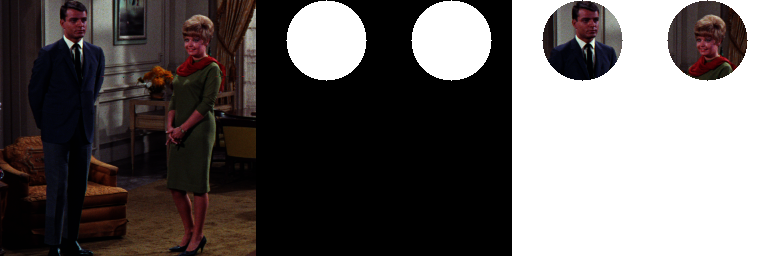

In [99]:
# Membaca citra
img_t = cv.imread('/content/drive/MyDrive/dataset/couple.tiff')

# Membuat mask
mask = np.zeros_like(img_t)
cv.circle(mask, (70, 40), 40, (255, 255, 255), -1)
cv.circle(mask, (195, 40), 40, (255, 255, 255), -1)

# Menggunakan bitwise_and untuk menggabungkan citra asli dan mask
and_result = cv.bitwise_and(img_t, mask)

# Mengganti bagian hitam dalam mask menjadi putih
and_result[mask == 0] = 255

# Menggabungkan citra asli, mask, dan hasilnya menjadi satu frame
final_frame_and = cv.hconcat((img_t, mask, and_result))

# Menampilkan frame hasil
cv2_imshow(final_frame_and)

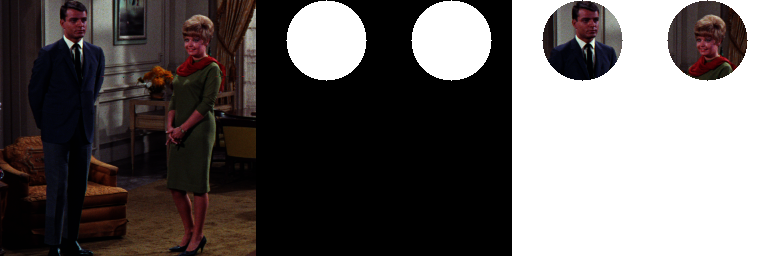

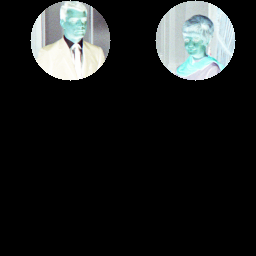

In [100]:
# Membaca citra
img_t = cv.imread('/content/drive/MyDrive/dataset/couple.tiff')

# Membuat mask
mask = np.zeros_like(img_t)
cv.circle(mask, (70, 40), 40, (255, 255, 255), -1)
cv.circle(mask, (195, 40), 40, (255, 255, 255), -1)

# Menggunakan bitwise_and untuk menggabungkan citra asli dan mask
and_result = cv.bitwise_and(img_t, mask)

# Mengganti bagian hitam dalam mask menjadi putih
and_result[mask == 0] = 255

# Menggabungkan citra asli, mask, dan hasilnya menjadi satu frame
final_frame_and = cv.hconcat((img_t, mask, and_result))

# Menampilkan frame hasil
cv2_imshow(final_frame_and)

# Menggunakan bitwise_not untuk menggabungkan citra asli dengan komplemen mask
nand_result = cv.bitwise_not(and_result)

# Menampilkan hasil operasi NAND
cv2_imshow(nand_result)

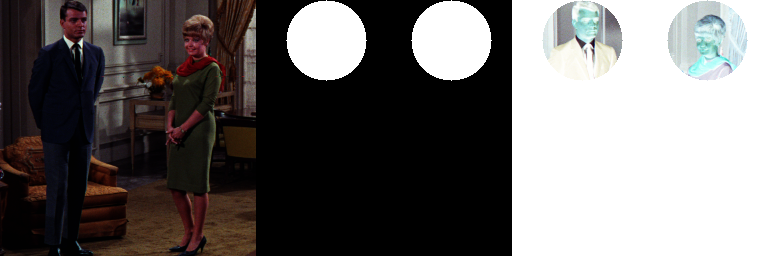

In [106]:
# Membaca citra
img_t = cv.imread('/content/drive/MyDrive/dataset/couple.tiff')

# Membuat mask
mask = np.zeros_like(img_t)
cv.circle(mask, (70, 40), 40, (255, 255, 255), -1)
cv.circle(mask, (195, 40), 40, (255, 255, 255), -1)

# Menggunakan bitwise_xor untuk menggabungkan citra asli dan mask
xor_result = cv.bitwise_xor(img_t, mask)

xor_result[mask == 0] = 255

# Menggabungkan citra asli, mask, dan hasilnya menjadi satu frame
final_frame_xor = cv.hconcat((img_t, mask, xor_result))

# Menampilkan frame hasil
cv2_imshow(final_frame_xor)